In [6]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 $('div.prompt').hide();
 } else {
 $('div.input').show();
$('div.prompt').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Code Toggle"></form>''')

# Benchmark Problem 1: Spinodal Decomposition

See [the extended essay][benchmarks] for a discussion about the need for benchmark problems. A journal publication will be available soon that provides a more extensive description and justification for the benchmark problems described here. 

## Free energy and dynamics

The spinodal decomposition benchmark problem has a single order parameter, $c$, which describes the atomic fraction of solute. The free energy of the system, $F$, is expressed as 
$$
F=\int_{V}\left(f_{chem}\left(c\right)+\frac{\kappa}{2}|\nabla c|^{2}\right)dV,
$$
where $f_{chem}$ is the chemical free energy density and $\kappa$ is the gradient energy coefficient. For this problem, we choose $f_{chem}$ to have a simple polynomial form,
$$
f_{chem}\left(c\right)=\varrho_{s}\left(c-c_{\alpha}\right)^{2}\left(c_{\beta}-c\right)^{2},
$$
such that $f_{chem}$ is a symmetric double-well with minima at $c_{\alpha}$ and $c_{\beta}$, and $\varrho_{s}$ controls the height of the double-well barrier. Because $f_{chem}$ is symmetric (Fig. 1), $c_{\alpha}$ and $c_{\beta}$ correspond exactly with the equilibrium atomic fractions of the $\alpha$ and $\beta$ phases. 

[benchmarks]: ../

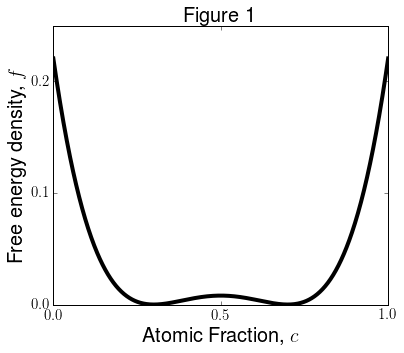

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

c_alpha = 0.3
c_beta = 0.7
rho_s = 5.

c = np.linspace(0, 1, 1000)
plt.figure(figsize=(6, 5))
plt.plot(c, rho_s * (c - c_alpha)**2 * (c - c_beta)**2, lw=4, color='k')
plt.xlabel("Atomic Fraction, $c$", fontsize=20)
plt.ylabel("Free energy density, $f$", fontsize=20)
plt.xticks([0, 0.5, 1.0], fontsize=15)
plt.yticks([0, 0.1, 0.2], fontsize=15)
plt.title("Figure 1", fontsize=20)
plt.show()



Because $c$ must obey a continuity equation -- the flux of $c$ is conserved -- the evolution of $c$ is given by the Cahn-Hilliard equation [[1][cahn1961spinodal]], which is derived from an Onsager force-flux relationship [[2][balluffi2005kinetics]]:
$$
\frac{\partial c}{\partial t}=\nabla\cdot\Bigg\{M\nabla\left(\frac{\partial f_{chem}}{\partial c}-\kappa\nabla^{2}c\right)\Bigg\}
$$
where $M$ is the mobility of the solute. For simplicity, both the mobility and the interfacial energy are isotropic. We choose $c_{\alpha}=0.3$, $c_{\beta}=0.7$, $\varrho_{s}=5$, $M=5$, and $\kappa=2$. Because the interfacial energy, diffuse interface width, and free energy parameterization are coupled, we obtain the diffuse interface width of $l=7.071 \sqrt{\kappa/\varrho}=4.47$ units over which $c$ varies as  $0.348<c<0.652$, and an interfacial energy $\sigma=0.01508\sqrt{\kappa \varrho}$ [[3][cahn1958free]].

[cahn1961spinodal]: http://dx.doi.org/10.1016/0001-6160(61)90182-1
[balluffi2005kinetics]: http://dx.doi.org/10.1002/0471749311 
[cahn1958free]: http://dx.doi.org/10.1063/1.1744102

## Domain geometries and boundary conditions

Several boundary conditions, initial conditions and computational domain geometries
are used to challenge different aspects of the numerical solver implementation. For both
benchmark problems, we test four combinations that are increasingly difficult to solve: two
with square computational domains, see (a) and (b), with side lengths of 200 units, one with a computational
domain in the shape of a "T", see (c), with a total height of 120 units, a total width of 100 units,
and horizontal and vertical section widths of 20 units, and one in which the compu-
tational domain is the surface of a sphere with a radius of r = 100 units, see (d). While most codes
readily handle rectilinear domains, a spherical domain may pose problems, such as having the
solution restricted to a two-dimensional curved surface. The coordinate systems and origins
are given in Fig. 2. Periodic boundary conditions are applied to one square domain, see (a), while
no-flux boundaries are applied to the other square domain, see (b), and the "T"-shaped domain, see (c). Periodic boundary conditions are commonly used with rectangular or rectangular prism domains
to simulate an infinite material, while no-flux boundary conditions may be used to simulate
an isolated piece of material or a mirror plane. As the computational domain is compact
for the spherical surface, no boundary conditions are specified for it. Note that the same
initial conditions are used for the square computational domains with no-flux, see (b), and periodic boundary conditions, see (a), such that when periodic boundary conditions
are applied, there is a discontinuity in the initial condition at the domain boundaries.

### (a) Square periodic

A 2D square domain with $L_x = L_y = 200$ and periodic boundary conditions.

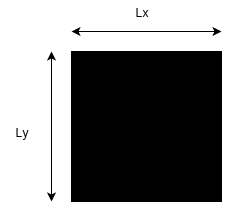

In [8]:
from IPython.display import SVG
SVG(filename='../images/block1.svg')

### (b) Square no-flux

A 2D square domain with $L_x = L_y = 200$ and no flux boundary conditions.

### (c) T-shape

A T-shaped region with zero flux boundary conditions and with dimensions, $a=b=100$  and  $c=d=20$ 

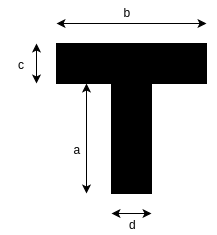

In [9]:
from IPython.display import SVG
SVG(filename='../images/t-shape.svg')

### (d) Sphere

The domain is the surface of a sphere with radius 100.

## Initial Conditions

The initial conditions for the first benchmark problem are chosen such that the average value of $c$ over the computational domain is approximately $0.5$.

### Initial condititions for (a), (b) and (c)

The initial value of $c$ for the square and "T" computational domains is
specified by 
\begin{eqnarray}
c\left(x,y\right) & = & c_{0}+\epsilon\left[\cos\left(0.105x\right)\cos\left(0.11y\right)+\left[\cos\left(0.13x\right)\cos\left(0.087y\right)\right]^{2}\right.\nonumber \\
 &  & \left.+\cos\left(0.025x-0.15y\right)\cos\left(0.07x-0.02y\right)\right],
\end{eqnarray}
where $c_{0}=0.5$ and $\epsilon=0.01$.

### Initial conditions for (d)

The initial value of $c$ for the spherical computational domain is specified by
\begin{eqnarray}
c\left(\theta,\phi\right) & = & c_{0}+\epsilon_{sphere}\left[\cos\left(8\theta\right)\cos\left(15\phi\right)+\left(\cos\left(12\theta\right)\cos\left(10\phi\right)\right)^{2}\right.\nonumber \\
 &  & +\left.\cos\left(2.5\theta-1.5\phi\right)\cos\left(7\theta-2\phi\right)\right],
\end{eqnarray}
where $\epsilon_{\text{sphere}}=0.05$, and $\theta$ and $\phi$ are the polar and azimuthal angles, respectively, in a spherical coordinate system. These angles are translated into a Cartesian system as $\theta=\cos^{-1}\left(z/r\right)$ and $\phi=\tan^{-1}\left(y/x\right)$ dependent upon angle.

In [83]:
from plotly import tools
import plotly.plotly as py
import plotly.graph_objs as go

Ngrid = 200

c_0 = 0.5
epsilon = 0.01

x_ab = np.linspace(0, 200, Ngrid)
y_ab = np.linspace(0, 200, Ngrid)

def c_ini(x_, y_):
    y = y_[:, None]
    x = x_[None, :]
    c = c_0 + epsilon * (np.cos(0.105 * x) * np.cos(0.11 * y) + (np.cos(0.13 * x) * np.cos(0.087 * y))**2 \
                         + np.cos(0.025 * x - 0.15 * y) * np.cos(0.07 * x - 0.02 * y))
    return x, y, c

y_c = np.linspace(0, 120, Ngrid)
x_c = np.linspace(-40, 60, Ngrid)
x_c_, y_c_, c_c_ = c_ini(x_c, y_c)
mask = ((x_c_ < 0) | (x_c_ > 20)) & (y_c_ < 100)
c_c_[mask] = np.NaN
c_c = c_c_

trace1 = go.Contour(
    x=x_ab,
    y=y_ab,
    z=c_ini(x_ab, y_ab)[2],
    zmin=0.47,
    zmax=0.53,
    line=dict(smoothing=0.85),
    ncontours=100,
    contours=dict(coloring="fill",
                  showlines=False))


trace2 = go.Contour(
    x=x_c,
    y=y_c,
    z=c_c,
    zmin=0.47,
    zmax=0.53,
    line=dict(smoothing=0.85),
    ncontours=100,
    contours=dict(coloring="fill",
                  showlines=False))

layout = dict(
    autosize=False,
    height=500.,
    width=900.,
    xaxis2 = dict(
        zeroline=False
    )
)

fig = tools.make_subplots(rows=1, cols=2, subplot_titles=('Initial Conditions for 1(a) and 1(b)', 
                                                          'Initial Conditions for 1(c)'), print_grid=False)

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)

fig['layout'].update(layout)

py.iplot(fig, sharing="public")

In [86]:
import plotly.plotly as py
from plotly.graph_objs import *
from plotly.tools import FigureFactory as FF

import numpy as np
from skimage import measure

X,Y,Z = np.mgrid[-110:110:40j, -110:110:40j, -110:110:40j]
surf_eq = X**2 + Y**2 + Z**2 - 100**2

vertices, simplices = measure.marching_cubes(surf_eq, 0)
x,y,z = zip(*vertices)  

colormap=['rgb(255,105,180)','rgb(255,255,51)','rgb(0,191,255)']
fig = FF.create_trisurf(x=x,
                        y=y, 
                        z=z, 
                        plot_edges=False,
                        colormap=colormap,
                        simplices=simplices,
                        title="Isosurface")
py.iplot(fig, sharing="public")

In [65]:
aa = np.arange(9).reshape((3, 3))
bb = aa > 4
print(bb)
print(aa)
aa[bb] = -3
print(aa)

[[False False False]
 [False False  True]
 [ True  True  True]]
[[0 1 2]
 [3 4 5]
 [6 7 8]]
[[ 0  1  2]
 [ 3  4 -3]
 [-3 -3 -3]]


In [53]:
?tools.make_subplots